# Applied Statistics - Ian McLoughlin

** Audrey Allen **

## Problem 1 - Lady Tasting Tea

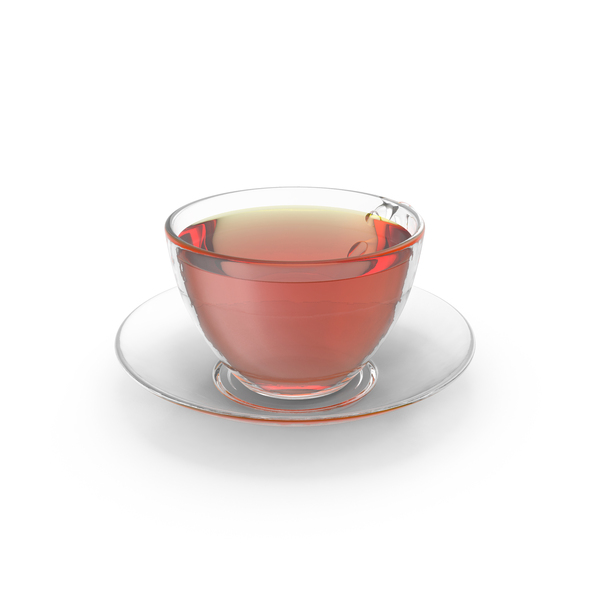

Let's extend the Lady Tasting Tea experiment as follows.
The original experiment has 8 cups: 4 tea-first and 4 milk-first.
Suppose we prepare 12 cups: 8 tea-first and 4 milk-first.
A participant claims they can tell which was poured first.  

Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance.
Compare your result with the original 8-cup experiment.  

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.  


https://jonykoren.medium.com/lady-tasting-tea-e46f89fbe9e8

### Background to the Lady Tasting Tea Experiment 

The story begins when Sir Ronald Aylmer Fisher participated in a tea party where a woman called Muriel Bristol, claimed to be able to tell if a tea was prepared with milk added to the cup first OR with milk added after the tea was poured.

Fisher designed an experiment where the lady was presented with 8 random cups of tea, 4 with milk first, 4 with tea first.

She then tasted each cup and reported which four she thought had milk added first.

Now the question Fisher asked is:

"how do we test whether she is really good at this or if she's just guessing?"

Fisher introduced the idea of a null hypothesis . In the lady tasting tea experiment, the null hypothesis was that the lady could not really tell the difference between teas, and she is just guessing.

Now,the idea of hypothesis testing is to attempt to reject the null hypothesis, or more accurately, to see how much the data collected in the experiment provides evidence that the null hypothesis is FALSE.

The test statistic is a simple count of the number of successes in selecting the 4 out of 8 cups. Moreover, the distribution of possible numbers of successes, assuming the null hypothesis is true, can be computed using the number of combinations.

Explain what I am doing here

Import various libraries required for this task below

In [3]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np 

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt # For plotting results

# Import comb function
from math import comb

Firstly I am going to extract the probability of my modified experiment (12 cups of tea) using the math.comb function as shown in the original Lady tasting tea experiment. 

In [4]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with tea in first.
no_cups_tea_first=8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

In [5]:
# Number of ways of selecting eight cups from twelve.
ways = math.comb(no_cups, no_cups_tea_first)

# Show.
ways

495

The probability of getting all 12 correct by pure chance is:- 

p=1/495​≈0.0020202020…≈0.00202

In comparison the original Lady Tasting Tea experiment (8 cups: 4 of each) has a p value of 1/70​≈≈0.0142857

So the 12-cup design with 8:4 is much harder to succeed at by chance (about 7× smaller probability).

### Lady Tasting Tea Experiment - Simulation Using Numpy - Explanation

1. Set up the experiment 
    - There are 12 cups of tea in total
    - 8 cups are prepared with tea first, and 4 cups with milk first.  
    - The person identifies the 8 tea-first cups. 

In [6]:
# Here we are going to the use the comb function to calculate he number of ways to choose k items from n items
# without regard to order or repetition

# https://www.codecademy.com/resources/docs/python/math-module/math-comb


N_total = 12 # This variable details the number of cups in the experiment or total - N Factorial
k_tea = 8   # This variable deails the number of cups with tea in first - K Factorial
exact_count = comb(N_total, k_tea) # 

p_exact = 1 / exact_count # This gives you the probability 'P' value of a perfect guess

print("Total ways to choose: ", exact_count)
print("Exact probability of perfect guess:", p_exact)

Total ways to choose:  495
Exact probability of perfect guess: 0.00202020202020202


### Simulation using Numpy

- Simulate multiple random guesses (with the correct number of tea/milk), shuffle them and compute how often a perfect match 
- Create an array called milktea_array - 8 tea first and 4 milk first
- Shuffle the values in the array multiple times - 1 million  - Can be updated as many times as needed
- For each shuffle compare with the milktea_array values
- Count how many times the shuffled values match the true values
- Estimate the probability of such a match under the null hypothesis - guessing

In [ ]:
#  Simulating the probability of randomly guessing the correct sequence of 8 "tea first" and 4 "milk first" cups.

# Set random seed for reproducibility
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
# Fixes the random number generator state to produce repeatable results 
np.random.seed(42)

#  Define the original array of 8 "tea" and 4 "milk"
#  https://docs.python.org/3/tutorial/introduction.html#lists
#  Python list multiplication is an efficient way to repeat elements 
milktea_array = np.array(['tea'] * 8 + ['milk'] * 4)

#  Set the number of simulations (Monte Carlo method)
#  https://realpython.com/monte-carlo-python/
#  Monte Carlo simulations rely on running many trials to approximate probabilities
n_simulations = 1_000_000

#  Initialize counter to count exact matches
match_count = 0

#  Simulation loop
#  https://realpython.com/for-loop-python/
#  A for-loop efficiently runs the simulation the required number of times.
for _ in range(n_simulations):

    #  Randomly shuffle the array without replacement
    #  https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
   
    guess = np.random.permutation(milktea_array)

    #  Check if the shuffled guess matches the original array
    #  https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html
    #  Compares two arrays element-wise and shape-wise for exact match.
    if np.array_equal(guess, milktea_array):
        match_count += 1  # Add one if perfect match is found

#  Estimate the probability by dividing matches by total trials
#  https://en.wikipedia.org/wiki/Law_of_large_numbers

estimated_prob = match_count / n_simulations

# Print final result with 8 decimal places
# https://docs.python.org/3/library/string.html#format-specification-mini-language

print(f"Estimated probability of a perfect match by chance: {estimated_prob:.8f}")


Estimated probability of a perfect match by chance: 0.00203100


### Comparison of my experiment (12 cups) with Fishers original experiment (8 cups)

Both of these experiments test whether a lady could truly tell if the either the milk or the tea was poured first into a cup. This is a famous example of hypothesis testing.

- Null hypothesis (No real ability)
- Alernative hypothesis (She can tell the difference)

If the lady just guesses at random the probability of getting all 4 correct is 1/70 or 0.0143. At 1.4% Fisher concluded with this probability that there would be strong evidence to suggest she could tell the difference.

With the experiment of 12 cups (8 tea first, 4 milk first). 

The probability of choosing the correct 8 tea first  from 12 is 12/8 = 495. The probability if she chooses completely at random is 1/495 or 0.0020 or 0.2%.

The probability of guessing the correct 8 cups in the modified experiment is less than Fishers experiment meaning that the lady has a greater chance of guessing the cups that have tea in it in the original experiment.

It is clear from my line graph below that the more cups in the experiment the less the probability there is of guessing correctly by chance.

### Report and Interpret the estimated probability of the Modified Experiment

If performance is statisically significant then the null hypothesis is rejected in favour for the alternative hypothesis - Meaning the lady can really tell the difference between the types of tea and it isn't just random guessing.

- Both experiments are testing the same principle - Fishers original 8 cup experiment and the modified 12 cup experiment
- The 12 cup modified experiment makes random guessing less likely so if successful it would lean towards the alernative hypothesis that the lady can indeed tell the difference

In statistics the p-value threshold is the cutoff point used to decide whether to reject the null hypothesis in a hypothesis test.

In the extended design (12 cups) the probability of perfectly guessing by chance drops dramatically from 1.4% to 0.2%. This basically means that if the lady guesses all cups that have milk in them first the eveidence against random guessing is even stronger than before.

You can either 
 - Keep a strict threshold (α ≈ 0.002) - Only all correct answers count as eveidence of real ability - all 12 cups must be guessed correctly
 - Relax the threshold (α = 0.05) - Allow 11 or 10 out of the 12 to count as strong evidence

https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types

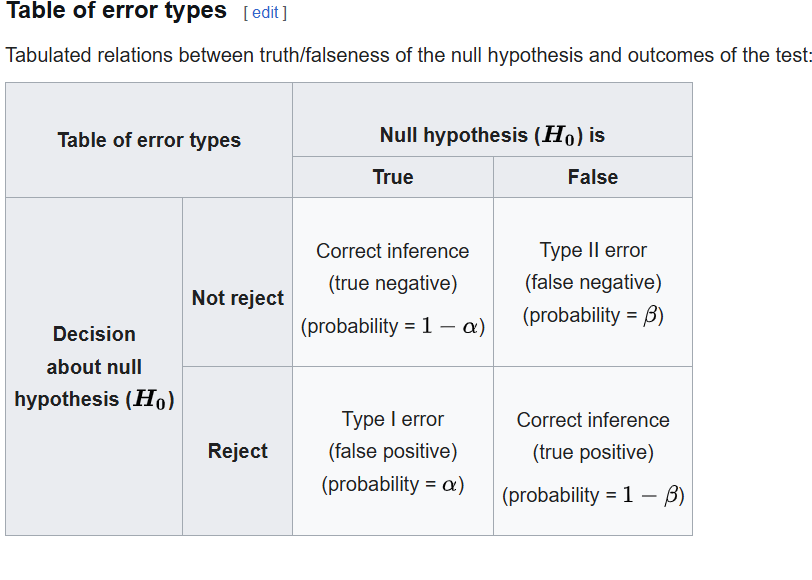

In terms of false positives and false negatives, a positive result corresponds to rejecting the null hypothesis, while a negative result corresponds to failing to reject the null hypothesis; "false" means the conclusion drawn is incorrect. Thus, a type I error is equivalent to a false positive, and a type II error is equivalent to a false negative.

A perfect test would have zero false positives and zero false negatives but in the world of statistics and real data we know this is not the case.

- Type 1 error rate - False Positive-  Is the probability of rejecting the null hypothesis given it is true - Probability of a type 1 error is shown by the symbol α (Alpha) - Usually the significance level is set to 0.05 (5%) - acceptable to have a 5% probability of incorrectly rejeecting the null hypothesis.

- Type 2 error rate - False Negative - Is the probability of failing to reject the null hypothesis even though the alernative hypothesis is true - You conclude there is no evidence when there is one - The probability of a type 2 error is shown by the symbol β (beta).

Usually decreasing one error type increases the other. What we really need to achieve in statisical hypothesis testing is to stabilise as much as possible and mininmise the probability as much as we can of producing false positives and negatives.

- Two options 

Option 1

Reject null hypothesis if the lady guesses > 10 cups correctly. 

Option 2

Only reject null hypothesis if the lady guesses the 12 cups correctly. As calculated previously this is a probability of 𝛼 ≈ 0.0020 α≈0.0020 (about 0.2%) - Very strict conditions

If you go with option 2 which is reject the null hypothesis only if the lady guesses all 12 cups correctly (8 tea first/4 milk first) this is far stricter than Fishers original experiment for his 8 cup perfect score which was 0.014. This means few false positives (Type 1 error) but maybe increasing the likelihood of type 2 error.

### Conclusion - Interpretation and p value threshold discussion

In the original design a perfect p classification yields p = 1.43. In the extended design a perfect classifcation yields p = 0.20% (7 times more evidence against chance). I think because my modified experiment makes a perfect score less likely under the null I would not relax my p value. If anything I would tighten the threshold and still reject on a perfect classification in the 12 cup design.

In short a perfect identification in the 12 cup design is very compelling (0.2%) so I would not relax my p threshold.

The graph below details (using numpy) that as the number of cups increase in the experiment the less the probability is that that the lady has chosen the cups by pure chance. The percentage probability goes from 0.2020% (12 cups) to 0.0008% (20 cups) so if the lady correctly guesses the 20 cups correctly then the null hypothesis is rejected and the alternative hypothesis that she does have ability to tell the difference is strongly supported here. 

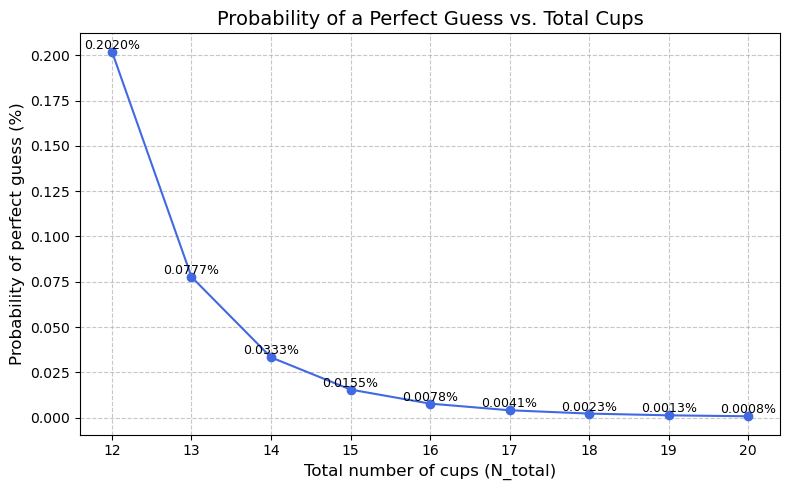

In [19]:
# https://chatgpt.com/share/68f11265-8a68-8012-9b46-84dbe72c2aa5 - I just want to demonstrate that the greater the number of cups of tea the less likely it is that the lady will guess correctly
# by pure chance - The graph below shows that


# Parameters
k_tea = 8  # number of tea-first cups
N_values = np.arange(12, 21)  # total cups: 8 to 20
p_exact = [1 / comb(N, k_tea) if N >= k_tea else np.nan for N in N_values]

# Convert to percentages for readability
p_percent = [p * 100 for p in p_exact]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(N_values, p_percent, marker='o', linestyle='-', color='royalblue')

# Add readable percentage labels above each point
for N, p in zip(N_values, p_percent):
    plt.text(N, p, f"{p:.4f}%", ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Probability of a Perfect Guess vs. Total Cups", fontsize=14)
plt.xlabel("Total number of cups (N_total)", fontsize=12)
plt.ylabel("Probability of perfect guess (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

*** 

## End Problem 1


## Problem 2 - Normal Distribution

https://www.investopedia.com/terms/n/normaldistribution.asp

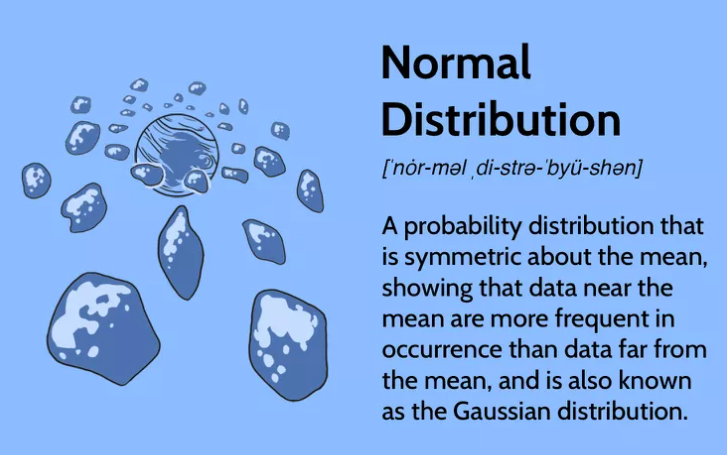


Generate 100,000 samples of size 10 from the standard normal distribution. <br />
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).<br />
Plot histograms of both sets of values on the same axes with transparency.<br />
Describe the differences you see.<br />
Explain how you expect these differences to change if the sample size is increased.<br />

I am going to break down this task into 4 main pieces

1. Generate 100,000 samples of size 10 from the standard normal distribution
2. For each sample compute the standard deviation with  `ddof=1` (sample SD) and with `ddof=0`
3. Plot histograms of both sets of values on the same axes with transparency
4. Describe the differences you see
5. Explain how you expect these differences to change if the sample size is increased.

### What is the standard normal distribution

https://www.datacamp.com/blog/standard-normal-distribution

The standard normal distribution is a special case of the normal distribution with a mean of 0 and a standard deviation of 1. It's a symmetric curve centered at zero, meaning values are equally likely to occur on either side of the center. As you move further from the center in either direction, the probability of observing those values decreases at the same rate.

https://www.scribbr.com/statistics/standard-normal-distribution/

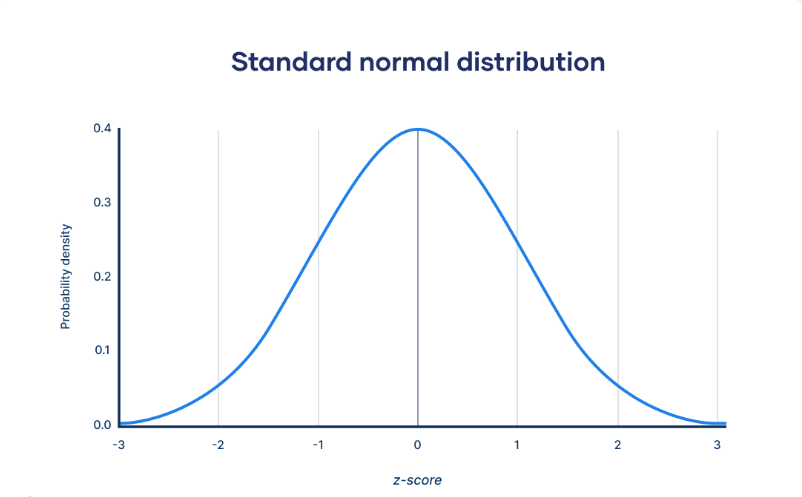

### What are the properties of Normal Distribution

https://www.geeksforgeeks.org/python/python-normal-distribution-in-statistics/

1. Symmetric distribution - The normal distribution is symmetric about its mean point. It means the distribution is perfectly balanced toward its mean point with half of the data on either side. 
2. Bell-Shaped curve - The graph of a normal distribution takes the form bell-shaped curve with most of the points accumulated at its mean position. The shape of this curve is determined by the mean and standard deviation of the distribution 
3. Empirical Rule - The normal distribution curve follows the empirical rule where 68% of the data lies within 1 standard deviation from the mean of the graph, 95% of the data lies within 2 standard deviations from the mean and 99.7% of the data lies within 3 standard deviations from the mean.

In [20]:
# Generate 100,000 samples of size 10 from the standard normal distribution

# https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html

# We will look at the numpy package - The formula to calulate the standard normal distribution is random.normal(loc=0.0, scale=1.0, size=None)
# Also importing matplotlib as need to create a histogram 

# Generate a random normal sample
# The below piece of code produces a 2D NumPy array of random numbers drawn from a normal distribution. This is stored in the variable called Data.
# This code creates a dataset of 100,000 samples, each with 10 features, where every value is randomly drawn from a standard normal distribution (mean 0, standard deviation 1) - 
# The default values are chosen for mean and SD 


# Step 1: Generate 100,000 samples of size 10 from the standard normal distribution

n_samples = 100_000
sample_size = 10
data = np.random.randn(n_samples, sample_size)

# Next step for each sample compute the standard deviation with  `ddof=1` (sample SD) and with `ddof=0` 

#https://www.geeksforgeeks.org/python/numpy-std-in-python/

# ddof: int, optional. "Delta Degrees of Freedom". The divisor used in the calculation is N - ddof,
# where N is the number of elements. The default is ddof=0, which gives the population standard deviation.

# https://medium.com/@bluewall_46049/standard-deviation-variance-2424395a13be


# ddof
# As a side note pandas and numpys both use what is called “Delta Degrees of Freedom” or ddof by default.

# Pandas ddof defaults to 1 (sample standard deviation/variance)
# Numpy ddof defaults to 0 (population standard deviation/variance)
# The ddof is subtracted from the divisor during the calculation. 
# This changes the calculation and the outcome based on the context (sample population).

# Population distribution are actual distribution scores of the entire population often described with Greek letters,
# sample distribution is the distribution of scores in a particular sample, and the sampling is a distribution of sample statistics
# which is usually the mean.


# Step 2: Compute standard deviations
std_ddof1 = np.std(data, axis=1, ddof=1)  # Sample SD (unbiased)
std_ddof0 = np.std(data, axis=1, ddof=0)  # Population SD (biased)



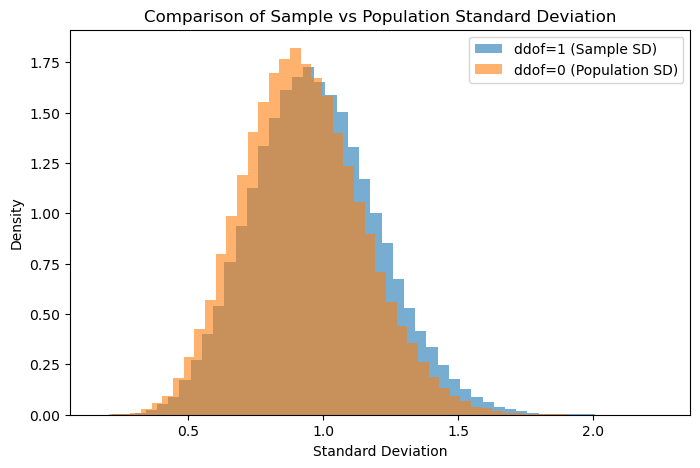

In [21]:
# Step 3: Plot histograms of both sets of standard deviations 

plt.figure(figsize=(8, 5))

# plt.hist This function creates a histogram
# bins This specifies the number of bars on the chart
# alpha - Sets the transparency of the bars - this is so we can se the difference between both standard deviations
# Color - Sets the colour of the bars
# Label - Adds a label for the legend

#https://chatgpt.com/share/691b6de7-a24c-8012-8b0c-677b600fa54b

plt.hist(std_ddof1, bins=50, alpha=0.6,  
         label='ddof=1 (Sample SD)', density=True)
plt.hist(std_ddof0, bins=50, alpha=0.6, 
         label='ddof=0 (Population SD)', density=True)
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Comparison of Sample vs Population Standard Deviation')
plt.legend()
plt.show()

# Show the plot
plt.show()





### Step 4: Describe the differences you see

There is quite a bit of overlap between the sample and population standard deviation. The population SD(ddof=0) veers more to the left of the histogram (Light orange colour) and the sample SD(ddof=1)has values slightly to the right of the mean(light blue colour). This means that the sample spread is larger than the population. This could be due to the fact that the sample data may not be representative of the population data and may vary.

### Step 5: Explain how you expect these differences to change if the sample size is increased

I will test this concept of increasing the sample size to see what exactly happens in the histogram. I would imagine that the larger the sample size the less noticable the differences between the sample and population SD. The smaller the sample size the more distinguishable the differences will be.

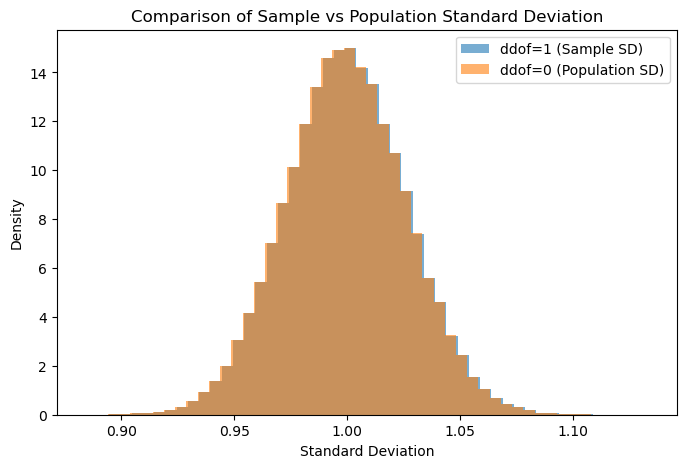

In [22]:
# Same code as above but with larger sample size

n_samples = 100_000
sample_size = 700
data = np.random.randn(n_samples, sample_size)


# Compute standard deviations
std_ddof1 = np.std(data, axis=1, ddof=1)  # Sample SD (unbiased)
std_ddof0 = np.std(data, axis=1, ddof=0)  # Population SD (biased)


plt.figure(figsize=(8, 5))
plt.hist(std_ddof1, bins=50, alpha=0.6,  
         label='ddof=1 (Sample SD)', density=True)
plt.hist(std_ddof0, bins=50, alpha=0.6, 
         label='ddof=0 (Population SD)', density=True)
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Comparison of Sample vs Population Standard Deviation')
plt.legend()
plt.show()

# Show the plot
plt.show()



### Conclusion - Increase in sample size from 10 to 700

As you can see I have increased the sample size from 10 to 700 and both the sample and the population standard deviations completely overlap. Each individual sample will have 700 observations rather than 10. The larger the sample size the closer the two disributions move together.

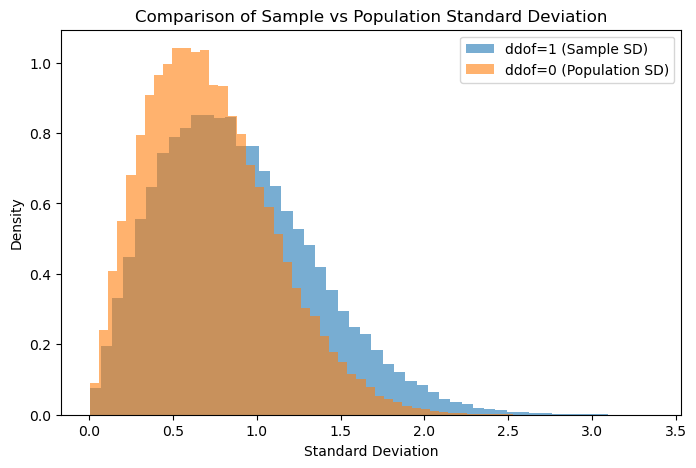

In [23]:
# Same code as above but with smaller than original sample size

n_samples = 100_000
sample_size = 3
data = np.random.randn(n_samples, sample_size)


# Compute standard deviations
std_ddof1 = np.std(data, axis=1, ddof=1)  # Sample SD (unbiased)
std_ddof0 = np.std(data, axis=1, ddof=0)  # Population SD (biased)


plt.figure(figsize=(8, 5))
plt.hist(std_ddof1, bins=50, alpha=0.6,  
         label='ddof=1 (Sample SD)', density=True)
plt.hist(std_ddof0, bins=50, alpha=0.6, 
         label='ddof=0 (Population SD)', density=True)
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Comparison of Sample vs Population Standard Deviation')
plt.legend()
plt.show()

### Conclusion - Decrease in sample size from 10 to 3

As you can see I have decreased the sample size from 10 to 3 and the differences between both the sample and the population SD is extremely evident and obvious. 

So in summary the larger the sample size both the the sample and population SD move closer together. There is less variability in estimates.

*** 

## End Problem 2

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

### Recap on type II error and null hypothesis

- Null Hypothesis in Statistics

https://www.scribbr.com/statistics/null-and-alternative-hypotheses/

The null and alternative hypothesis are two competing claims that researchers weigh evidence for and against using a statistical test:

- Null hypothesis (H0): There’s no effect in the population.
- Alternative hypothesis (Ha or H1): There’s an effect in the population.
The effect is usually the effect of the independent variable on the dependent variable.

https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

https://projects.iq.harvard.edu/statistics/book/error-types

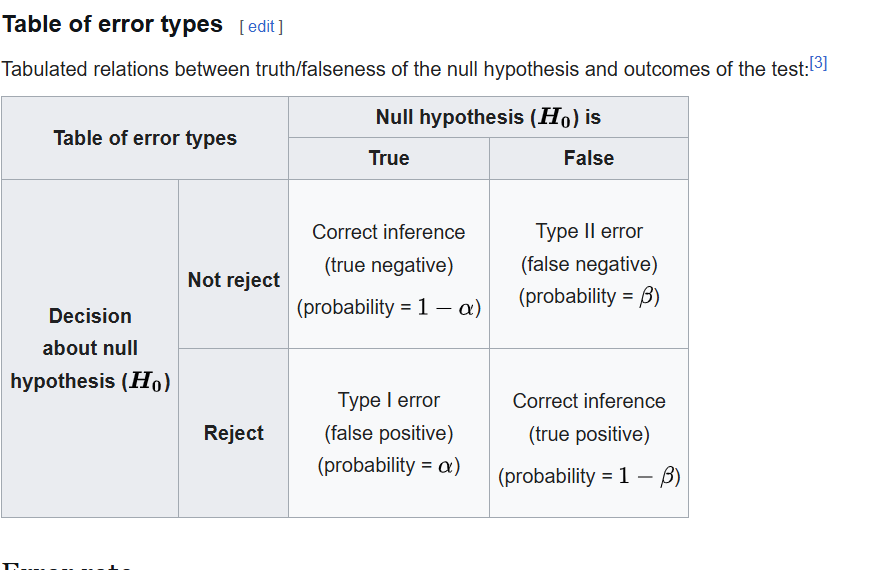

https://www.optimizely.com/optimization-glossary/type-2-error/#:~:text=Type%20II%20errors%20are%20like,exist%20when%20it%20actually%20does.

 - Type II Error - Type II errors are like “false negatives,” an incorrect rejection that a variation in a test has made no statistically significant difference. Statistically speaking, this means you're mistakenly believing the false null hypothesis and think a relationship doesn't exist when it actually does. You commit a type 2 error when you don’t believe something that is in fact true.

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.

https://github.com/sondosaabed/SP.TOP-Data-Science-and-Analytics/blob/main/Assignments/A3-Normal-Distribution-Sampling-np/1190652_A3.ipynb


### Standard Normal Distribution and Normal Distribution
-------------------
The data is said to be normally distributed simply when 50% of the cases are above the mean and 50% of the cases are bellow the mean. It is also called and known as the (Gaussian distrubtion). A normal distribution can have any mean  and standard deviation, while a standard normal distribution is a special case with a fixed mean of 0 and a standard deviation of 1. 

 1 - Generate two random samples:

 - One from a standard normal distribution (mean = 0, std dev = 1)
 - One from a normal distribution with mean = 𝑑 and std dev = 1

2. Perform an independent samples t-test

3. Check if the test fails to reject the null hypothesis (p-value ≥ 0.05)

4. Count that as a Type II error if it fails to reject (because the null is false when 𝑑 > 0) - Record the proportion of times the null hypothesis is not rejected.

In [24]:
# Step 1: Import libraries
import scipy.stats as stats            # For t-test and statistical functions


# SciPy documentation (ttest_ind)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Step 2: Define parameters for the simulation
sample_size = 100                      # Number of data points in each group
Pthreshold = 0.05                      # Significance level for the hypothesis test
num_simulations = 1000                 # Number of simulations per value of d
d_values = np.arange(0, 1.1, 0.1)      # Mean differences from 0 to 1.0 in steps of 0.1
type_ii_errors = []                    # Store Type II error rates here



In [ ]:
# Step 3: Run the simulation for each d
for d in d_values:
    fail_to_reject_count = 0  # Counter for Type II errors (failures to reject H0)

#Numpy Random Normal Generator - Generation of random numbers
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html    
    
    for _ in range(num_simulations):
        # Generate two samples:
        # One from N(0, 1 - Standard Normal Distribution), the other from N(d, 1 - Normal Distribution)
        standardnormal = np.random.normal(loc=0, scale=1, size=sample_size)
        normal = np.random.normal(loc=d, scale=1, size=sample_size)

         # https://github.com/xaviervasques/t-test/blob/master/ttest_scipy.py 
        # Perform independent two-sample t-test
        t_stat, p_value = stats.ttest_ind(standardnormal, normal)

     
        print("t = " + str(t_stat))
        print("p = " + str(p_value))

        # If p-value is not significant, we failed to reject H0 (i.e., Type II error) - We increase by 1 here 
        if p_value >= Pthreshold:
            fail_to_reject_count += 1
    
    # Store proportion of Type II errors for this d
    type_ii_errors.append(fail_to_reject_count / num_simulations)

t = -0.5965881260369661
p = 0.5514638947356758
t = -0.8421900270712894
p = 0.4006976988255002
t = 1.2146729649653765
p = 0.22593744829440815
t = -0.2485910548359788
p = 0.8039347808996993
t = -0.7605351791185705
p = 0.4478394601673229
t = -0.8667705596003547
p = 0.3871168994615196
t = 0.48733044857644897
p = 0.6265632777790566
t = -0.8180446787948319
p = 0.41431503971903527
t = 0.8291876429526294
p = 0.40799673769676315
t = 0.27584673459479253
p = 0.7829534713558389
t = -0.6994425866382576
p = 0.4850963549475774
t = -0.5148911299669434
p = 0.6072034084004224
t = 0.30935532563101714
p = 0.757376551362687
t = 0.6456134220037817
p = 0.5192772179145848
t = -0.656395670555881
p = 0.5123316877701694
t = -0.9265574983168136
p = 0.3552843308207091
t = -1.5721320569621213
p = 0.11751651227549736
t = -1.0263563939261695
p = 0.3059758578220153
t = 0.34800919312015044
p = 0.7282029813077393
t = -0.760140234963226
p = 0.44807493336562265
t = -2.0690488538457887
p = 0.039840189954298506
t = -0.73729

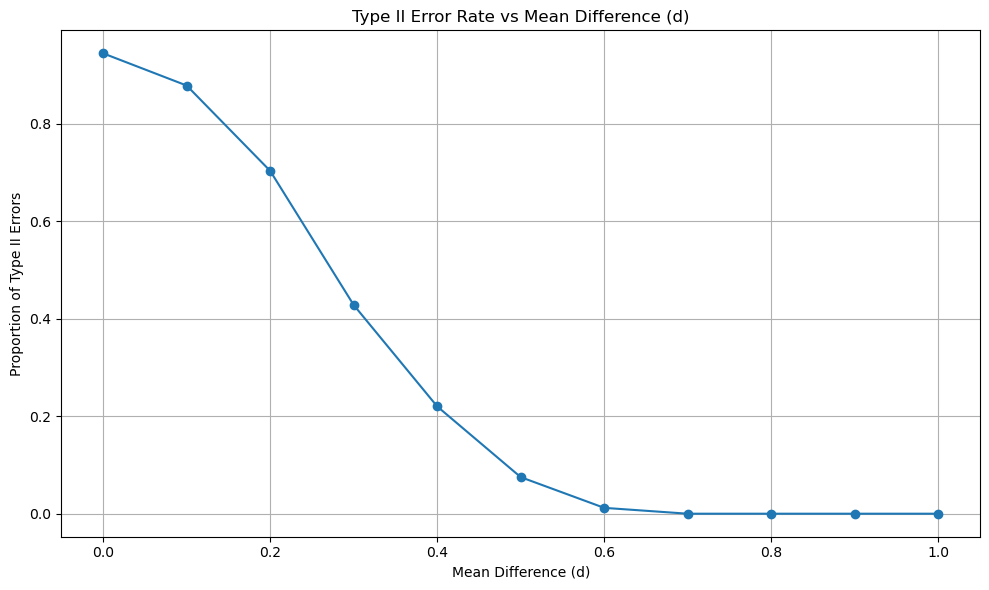

Proportion of Type II errors for each mean difference (d):
d = 0.0: Type II error rate = 0.944
d = 0.1: Type II error rate = 0.878
d = 0.2: Type II error rate = 0.703
d = 0.3: Type II error rate = 0.428
d = 0.4: Type II error rate = 0.220
d = 0.5: Type II error rate = 0.075
d = 0.6: Type II error rate = 0.012
d = 0.7: Type II error rate = 0.000
d = 0.8: Type II error rate = 0.000
d = 0.9: Type II error rate = 0.000
d = 1.0: Type II error rate = 0.000


In [ ]:
# Matplotlib plotting
# https://matplotlib.org/stable/api/pyplot_api.html    

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(d_values, type_ii_errors, marker='o')
plt.title("Type II Error Rate vs Mean Difference (d)")
plt.xlabel("Mean Difference (d)")
plt.ylabel("Proportion of Type II Errors")
plt.grid(True)
plt.tight_layout()
plt.show()



In [27]:
# Step 5: Output the results as a dictionary
type_ii_errors_summary = dict(zip(d_values, type_ii_errors))
print("Proportion of Type II errors for each mean difference (d):")
for d, err in type_ii_errors_summary.items():
    print(f"d = {d:.1f}: Type II error rate = {err:.3f}")

Proportion of Type II errors for each mean difference (d):
d = 0.0: Type II error rate = 0.944
d = 0.1: Type II error rate = 0.878
d = 0.2: Type II error rate = 0.703
d = 0.3: Type II error rate = 0.428
d = 0.4: Type II error rate = 0.220
d = 0.5: Type II error rate = 0.075
d = 0.6: Type II error rate = 0.012
d = 0.7: Type II error rate = 0.000
d = 0.8: Type II error rate = 0.000
d = 0.9: Type II error rate = 0.000
d = 1.0: Type II error rate = 0.000


### Outcome and Explanation 

When d = 0, the null hypothesis is true, so the failure to reject is not a Type II error — it's correct behavior.

As d increases, the difference becomes easier to detect, so the Type II error rate should decrease.

You see a decreasing curve — high at d=0, and approaching 0 as d goes to 1.

d=0 - there is no difference between the groups (null hpothesis is true) - You should not reject the null hypothesis
As d increases (0.1 - 0.5) The true mean difference between the groups gets larger but the t-test doesn't always detect it - This is where we see high type II errors (0.1, 0.2 etc)
d=0.5 and higher - These are moderate to large effects - The test almost alwas detects the difference

Increasing the sample size significantly reduces the Type II error rate, especially for small to moderate effects. I will show an example of this below.

## End Problem 3

## Problem 4: ANOVA

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.




## End Problem 4

Problem 4 - References

